<a href="https://colab.research.google.com/github/ShravyaMalogi/Data-Analytics/blob/main/02_Data_Preprocessing_in_Noise_detection_removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original DataFrame with Noisy Data:
   age   salary  experience
0   25    50000           2
1   27    60000           3
2   28    55000           2
3   30    70000           4
4   22    48000           1
5  100   300000          20
6   29    60000           2
7   30    65000           3
8   32    70000           4
9  500  1000000          25

DataFrame after Removing Noisy Data (Outliers):
   age   salary  experience
0   25    50000           2
1   27    60000           3
2   28    55000           2
3   30    70000           4
4   22    48000           1
5  100   300000          20
6   29    60000           2
7   30    65000           3
8   32    70000           4
9  500  1000000          25


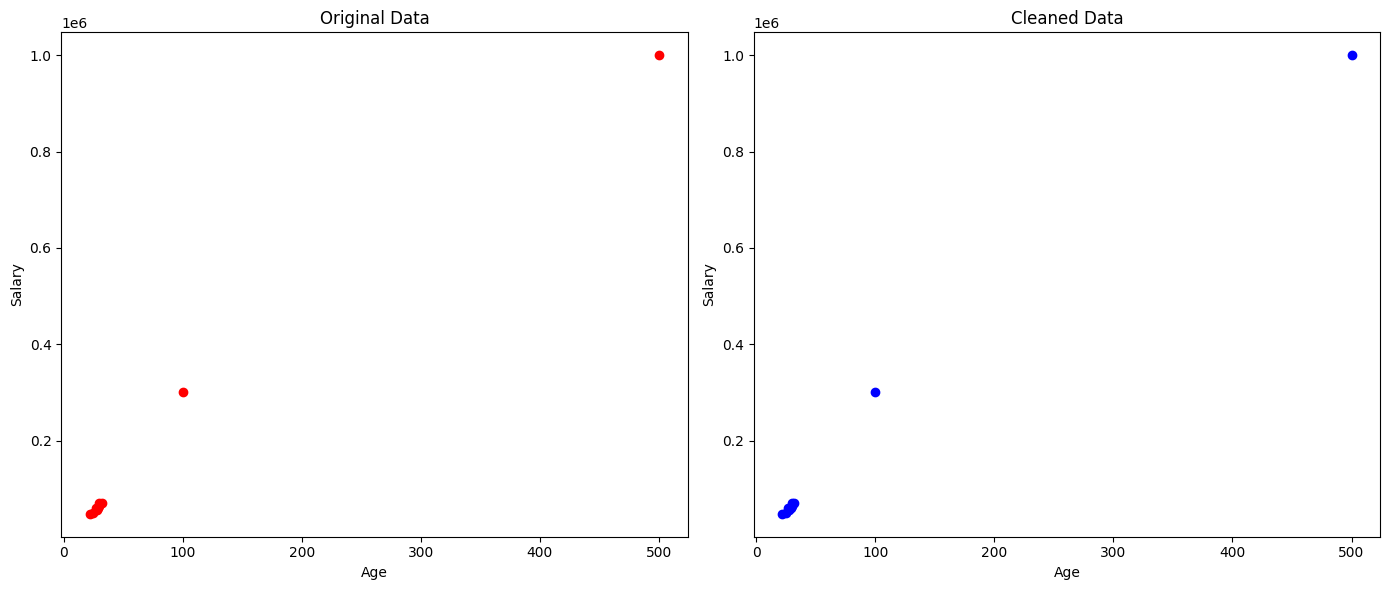


Z-scores for the cleaned data:
        age    salary  experience
0  0.406645  0.451017    0.569509
1  0.392451  0.415726    0.445703
2  0.385354  0.433372    0.569509
3  0.371161  0.380436    0.321897
4  0.427935  0.458075    0.693316
5  0.125613  0.431254    1.659005
6  0.378258  0.415726    0.569509
7  0.371161  0.398081    0.445703
8  0.356967  0.380436    0.321897
9  2.964320  2.901615    2.278037

Remaining outliers after cleaning (if any):
Empty DataFrame
Columns: [age, salary, experience]
Index: []


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Step 1: Create a sample dataframe with noisy data (outliers)
data = {
 'age': [25, 27, 28, 30, 22, 100, 29, 30, 32, 500], # 500 is an outlier
 'salary': [50000, 60000, 55000, 70000, 48000, 300000, 60000, 65000,70000, 1000000], # 1000000 is an outlier
 'experience': [2, 3, 2, 4, 1, 20, 2, 3, 4, 25], # 25 is an outlier
}

df = pd.DataFrame(data)

# Display the original dataframe
print("Original DataFrame with Noisy Data:")
print(df)

# Step 2: Detecting Outliers using Z-score
# Z-score measures how many standard deviations a point is from the mean
z_scores = np.abs(stats.zscore(df)) # Compute Z-scores for each column

# Step 3: Set a threshold for the Z-score (usually > 3 indicates an outlier)
threshold = 3

# Step 4: Remove rows where any feature has a Z-score greater than the threshold
df_cleaned = df[(z_scores < threshold).all(axis=1)]

# Display the cleaned dataframe
print("\nDataFrame after Removing Noisy Data (Outliers):")
print(df_cleaned)

# Step 5: Visualize the data before and after cleaning
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Original data visualization
axs[0].scatter(df['age'], df['salary'], color='red')
axs[0].set_title('Original Data')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Salary')

# Cleaned data visualization
axs[1].scatter(df_cleaned['age'], df_cleaned['salary'], color='blue')
axs[1].set_title('Cleaned Data')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Salary')
plt.tight_layout()
plt.show()

# Step 6: Check if there are any remaining outliers in the cleaned data
z_scores_cleaned = np.abs(stats.zscore(df_cleaned))
print("\nZ-scores for the cleaned data:")
print(z_scores_cleaned)

print("\nRemaining outliers after cleaning (if any):")
print(df_cleaned[(z_scores_cleaned > threshold).any(axis=1)])